In [0]:


# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 헬퍼(helper) 라이브러리를 임포트
import numpy as np
import matplotlib.pyplot as plt



print(tf.__version__)

1.14.0


# **1. 데이터 셋 설정하기**

In [0]:

fashion_mnist = keras.datasets.fashion_mnist

(tr_image, tr_label), (te_image, te_label) = fashion_mnist.load_data()

In [0]:
label_name = ['Top', 'Pants', 'Pullover', 'Dress', 'Coat',
               'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Shose']

In [0]:
tr_image.shape

(60000, 28, 28)

In [0]:
tr_label.shape

(60000,)

In [0]:
tr_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

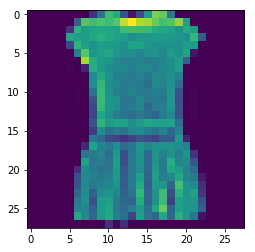

In [0]:
plt.figure()
plt.imshow(tr_image[3])

plt.show()

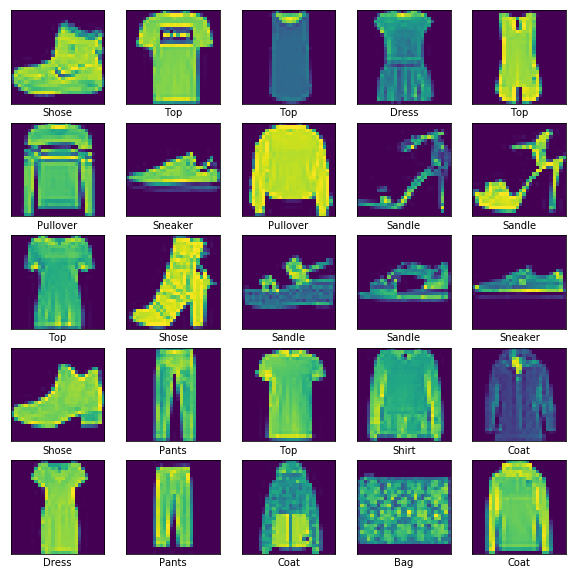

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tr_image[i])
    plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
tr_image = tr_image.reshape(60000, 784).astype('float32') / 255.0
te_image = te_image.reshape(10000, 784).astype('float32') / 255.0

In [0]:
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [0]:
val_image= tr_image[50000:]
val_label= tr_label[50000:]
tr_image = tr_image[:50000]
tr_label = tr_label[:50000]


In [0]:
val_image.shape

(10000, 784)

In [0]:
tr_rand= np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

In [0]:
tr_image = tr_image[tr_rand]
tr_label = tr_label[tr_rand]
val_image = val_image[val_rand]
val_label= val_label[val_rand]

# **2. 모델 구성하기**

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


# 3. 모델 학습과정 설정하기

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

In [0]:
hist = model.fit(tr_image, tr_label, epochs=100, batch_size=32,validation_data=(val_image, val_label))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 2.2533 - acc: 0.2314 - val_loss: 2.1228 - val_acc: 0.3233
Epoch 2/100
700/700 [==============================] - 0s 63us/step - loss: 2.0138 - acc: 0.4114 - val_loss: 1.9209 - val_acc: 0.4467
Epoch 3/100
700/700 [==============================] - 0s 61us/step - loss: 1.8106 - acc: 0.4857 - val_loss: 1.7322 - val_acc: 0.4867
Epoch 4/100
700/700 [==============================] - 0s 62us/step - loss: 1.6321 - acc: 0.5300 - val_loss: 1.5750 - val_acc: 0.5333
Epoch 5/100
700/700 [==============================] - 0s 63us/step - loss: 1.4742 - acc: 0.5729 - val_loss: 1.4487 - val_acc: 0.5667
Epoch 6/100
700/700 [==============================] - 0s 58us/step - loss: 1.3490 - acc: 0.5957 - val_loss: 1.3314 - val_acc: 0.5967
Epoch 7/100
700/700 [==============================] - 0

# 5. 모델 학습과정 살펴보기

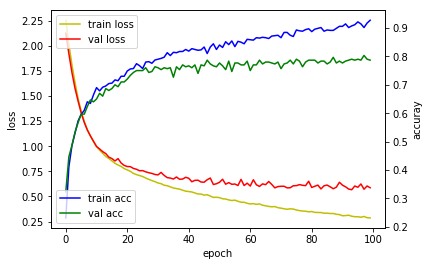

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.253254019873483, 2.01377781527383, 1.81064498765128, 1.6320535101209368, 1.474175387791225, 1.3490218905040197, 1.2479833105632236, 1.1645606136322022, 1.099659914970398, 1.0441101448876517, 0.9969519676480975, 0.961566264969962, 0.9290939508165632, 0.8981269254003252, 0.8773463528496879, 0.8537975403240748, 0.8298169704845973, 0.8123071554728917, 0.7982828232220242, 0.776327576977866, 0.7641930273600988, 0.7496366064889091, 0.728667128426688, 0.7170600380216327, 0.7073664821897234, 0.6983817454746791, 0.6827476242610386, 0.6698061639922006, 0.6577159377506802, 0.6472135608536856, 0.6336285287993295, 0.6266872828347342, 0.6112055626937322, 0.6064174951825823, 0.595068780694689, 0.584038564477648, 0.5779397685187203, 0.5724510373388018, 0.5620249683516366, 0.5523693067686898, 0.5484671854972839, 0.5440388679504394, 0.5344023891857692, 0.5239505508967809, 0.5237863899980273, 0.5130883032935006, 0.516900452205113, 0.5033530970982143, 0.49014548063278196, 0.4

# 6. 모델 평가하기

In [0]:
loss_and_acc = model.evaluate(te_image, te_label, batch_size=32)
print('## evaluation  ##')
print(loss_and_acc)

10000/10000 [==============================] - 0s 22us/step
## evaluation  ##
[0.6234635022640228, 0.7841]


# 7. 모델 사용하기

In [0]:
xhat = te_image
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[1.22700085e-05 3.10547284e-06 1.59673209e-06 ... 4.69718784e-01
  2.18283315e-03 3.91369611e-01]
 [1.25898208e-04 2.99526200e-05 8.71882677e-01 ... 7.38897921e-09
  6.33818272e-05 2.24308341e-08]
 [4.34300091e-06 9.99864340e-01 2.11641673e-05 ... 2.78694151e-10
  4.70053187e-08 1.04688125e-09]
 ...
 [6.26689428e-03 1.57258255e-05 7.96275272e-04 ... 2.40807130e-04
  9.07908320e-01 8.30771096e-05]
 [4.60590818e-05 9.90254104e-01 3.07097594e-04 ... 5.09890242e-07
  8.69520409e-06 1.36579990e-06]
 [3.25186411e-04 7.01888988e-04 3.30585288e-04 ... 3.43248546e-01
  1.56451687e-02 3.39865163e-02]]


In [0]:
te_image.shape

(10000, 784)

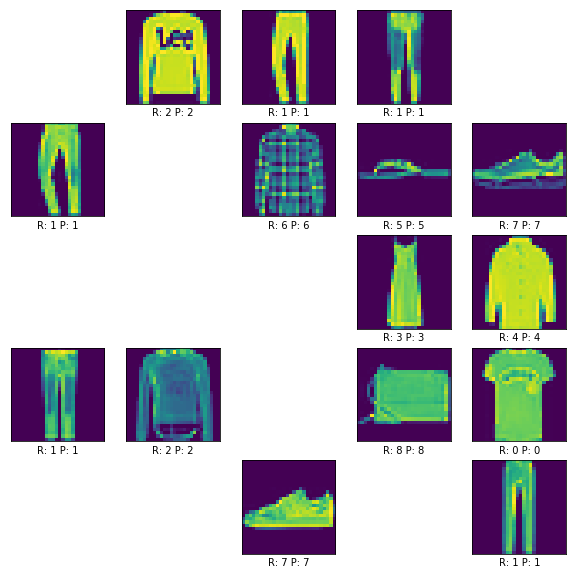

In [0]:


%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()

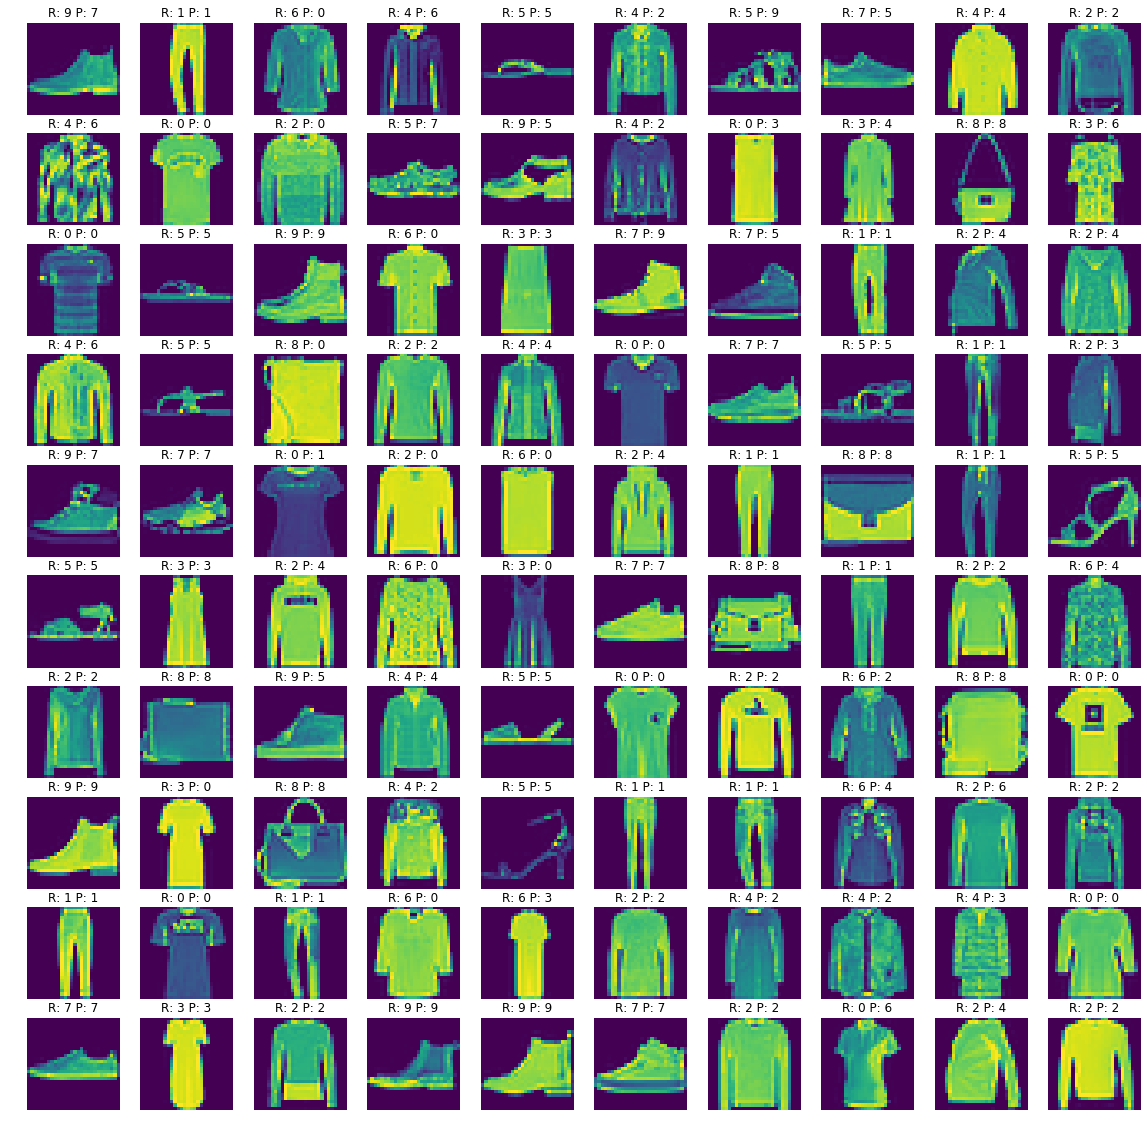

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



plt_row = 10
plt_col = 10

plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(te_label[i]) == np.argmax(yhat[i]):
        i += 1
      # continue
    
    sub_plt=axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(te_image[i].reshape(28, 28))
    sub_plt_title = 'R: ' + str(np.argmax(te_label[i])) + ' P: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()